In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [184]:
sleep_data = pd.read_csv('Sleep_Efficiency.csv')
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [185]:
Caffeinevssleep = sleep_data[['Bedtime','Wakeup time','Sleep duration','Sleep efficiency','REM sleep percentage','Deep sleep percentage','Light sleep percentage','Awakenings','Caffeine consumption']]
print(Caffeinevssleep)

                 Bedtime          Wakeup time  Sleep duration  \
0    2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1    2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2    2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3    2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4    2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   
..                   ...                  ...             ...   
447  2021-11-13 22:00:00  2021-11-13 05:30:00             7.5   
448  2021-03-31 21:00:00  2021-03-31 03:00:00             6.0   
449  2021-09-07 23:00:00  2021-09-07 07:30:00             8.5   
450  2021-07-29 21:00:00  2021-07-29 04:00:00             7.0   
451  2021-03-17 02:30:00  2021-03-17 10:00:00             7.5   

     Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0                0.88                    18                     70   
1                0.66                    19                     28   
2        

In [186]:

display(Caffeinevssleep.describe())

,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption
count,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000
mean,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396
std,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785
min,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000
25%,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000
50%,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000
75%,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000
max,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000


In [187]:
CaffeineMedian=25
Caffeinevssleep.fillna(CaffeineMedian,inplace=True)
Caffeinevssleep.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bedtime                 452 non-null    object 
 1   Wakeup time             452 non-null    object 
 2   Sleep duration          452 non-null    float64
 3   Sleep efficiency        452 non-null    float64
 4   REM sleep percentage    452 non-null    int64  
 5   Deep sleep percentage   452 non-null    int64  
 6   Light sleep percentage  452 non-null    int64  
 7   Awakenings              452 non-null    float64
 8   Caffeine consumption    452 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 31.9+ KB


/tmp/ipykernel_1497/1613937529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Caffeinevssleep.fillna(CaffeineMedian,inplace=True)


In [188]:
Caffeinevssleep[['Bed date', 'Bedtime']] = Caffeinevssleep['Bedtime'].str.split(' ', 1, expand=True)
Caffeinevssleep[['Wakeup date', 'Wakeup time']] = Caffeinevssleep['Wakeup time'].str.split(' ', 1, expand=True)
#sleep_data.loc(sleep_data['Bedtime'] >= object'20:00:00', 'Time of day') = 2

Caffeinevssleep['Time of day'] = Caffeinevssleep['Bedtime'].map(lambda x: 'Early morning' if x < '05:00:00' 
                                                      else 'Night' )
#sleep_data['Time of day'] = sleep_data['Bedtime'].map(lambda x: 'Evening' if x <= '05:00:00' else 'Evening')

/tmp/ipykernel_1497/2553318110.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  Caffeinevssleep[['Bed date', 'Bedtime']] = Caffeinevssleep['Bedtime'].str.split(' ', 1, expand=True)
/tmp/ipykernel_1497/2553318110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Caffeinevssleep[['Bed date', 'Bedtime']] = Caffeinevssleep['Bedtime'].str.split(' ', 1, expand=True)
/tmp/ipykernel_1497/2553318110.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  Caffeinevssleep[['Wakeup date', 'Wakeup time']] = Caffeinevssleep['Wakeup time'].str.split(' ', 1, expand=True)
/tmp/ipykerne

<Axes: xlabel='Caffeine consumption', ylabel='Bedtime'>

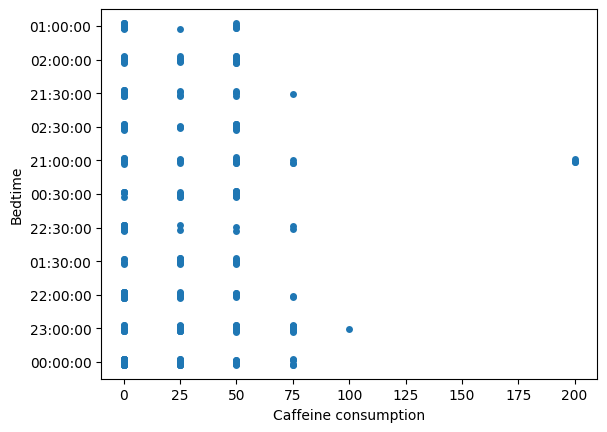

In [189]:
sns.stripplot(data=Caffeinevssleep, x='Caffeine consumption',y='Bedtime')

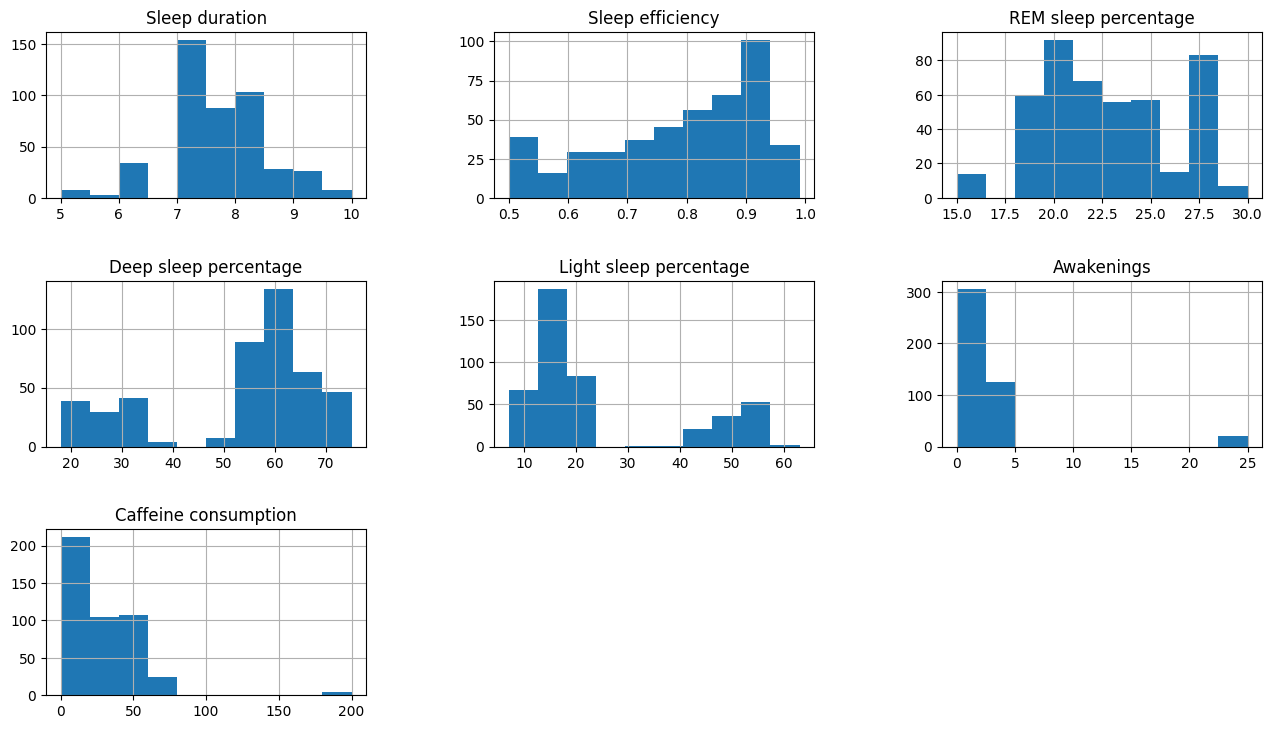

In [190]:
Caffeinevssleep.hist(layout=(4,3))
plt.subplots_adjust(left=0.1,right=2,top=2,bottom=0.1,hspace=0.5,wspace=0.4)
# Caffeinevssleep.hist()
# plt.tight_layout()
plt.show()

<Axes: xlabel='Caffeine consumption', ylabel='Sleep duration'>

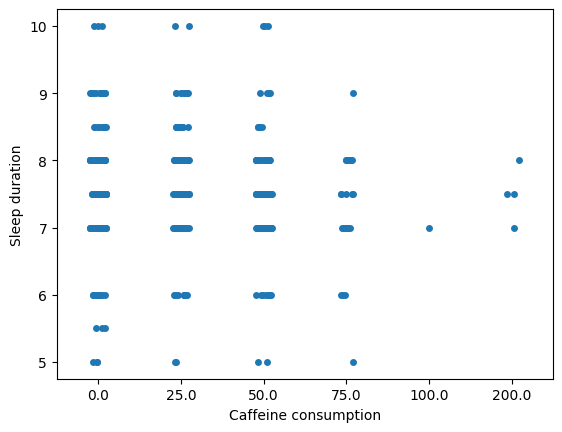

In [191]:
sns.stripplot(data=Caffeinevssleep, x='Caffeine consumption',y='Sleep duration')

<Axes: xlabel='Caffeine consumption', ylabel='Sleep efficiency'>

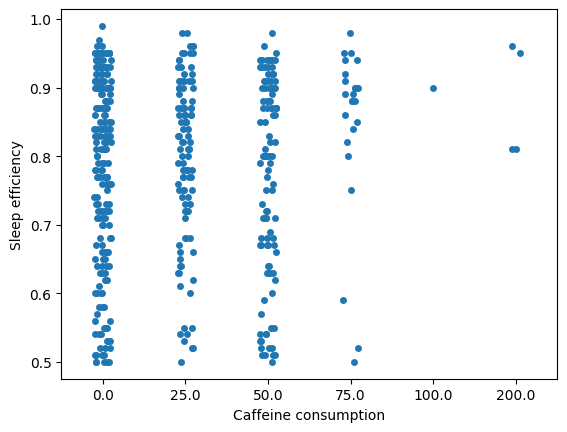

In [192]:
sns.stripplot(data=Caffeinevssleep, x='Caffeine consumption',y='Sleep efficiency')

<Axes: xlabel='Caffeine consumption', ylabel='REM sleep percentage'>

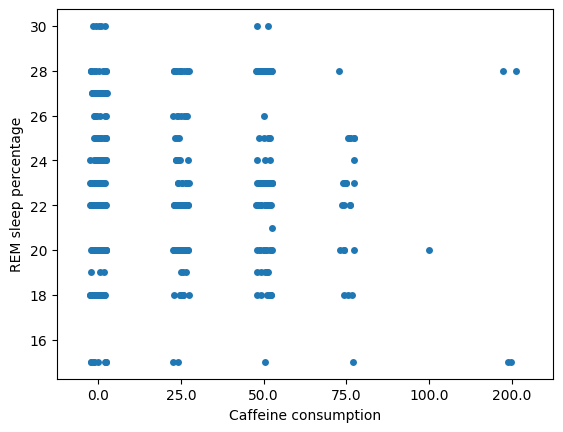

In [193]:
sns.stripplot(data=Caffeinevssleep, x='Caffeine consumption',y='REM sleep percentage')

<Axes: xlabel='Caffeine consumption', ylabel='Deep sleep percentage'>

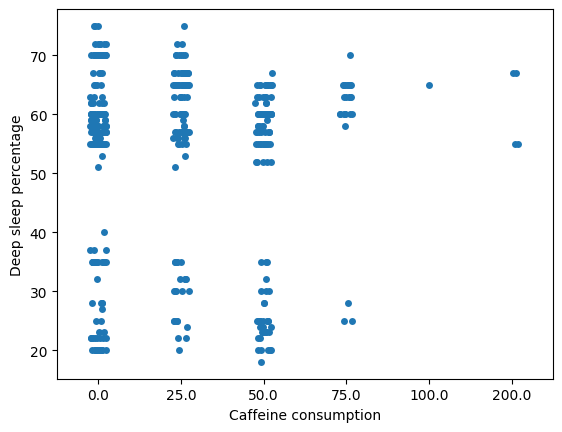

In [194]:
sns.stripplot(data=Caffeinevssleep, x='Caffeine consumption',y='Deep sleep percentage')

<Axes: xlabel='Caffeine consumption', ylabel='Light sleep percentage'>

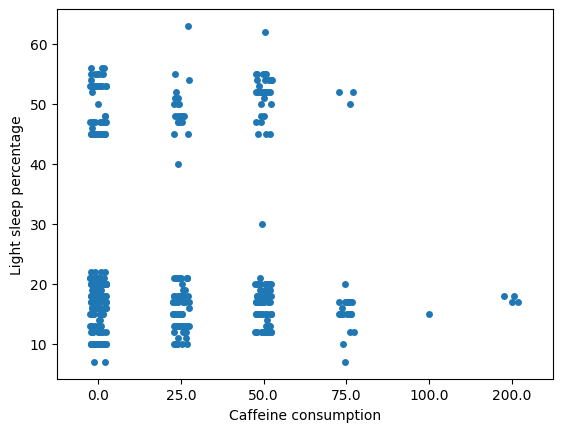

In [195]:
sns.stripplot(data=Caffeinevssleep, x='Caffeine consumption',y='Light sleep percentage')

<Axes: xlabel='Caffeine consumption', ylabel='Awakenings'>

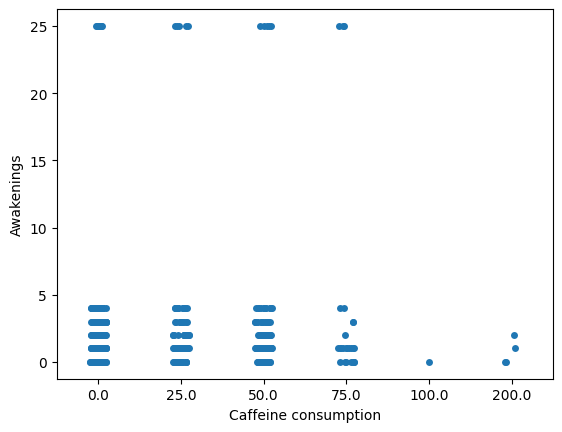

In [196]:
sns.stripplot(data=Caffeinevssleep, x='Caffeine consumption',y='Awakenings')

<Axes: xlabel='Caffeine consumption', ylabel='Density'>

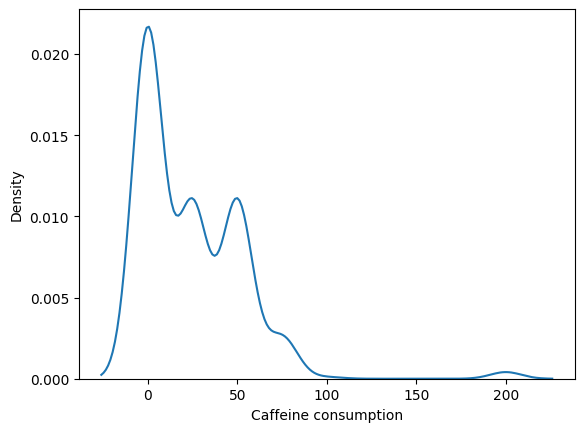

In [197]:
sns.kdeplot(Caffeinevssleep, x='Caffeine consumption')




<Axes: xlabel='Caffeine consumption', ylabel='count'>

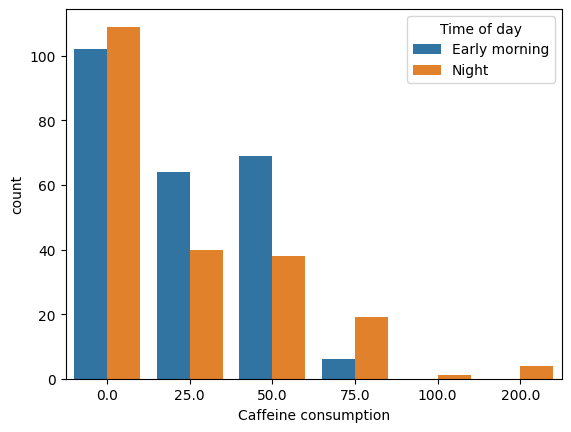

In [198]:
sns.countplot(Caffeinevssleep, x='Caffeine consumption', hue='Time of day')

<Axes: xlabel='Caffeine consumption'>

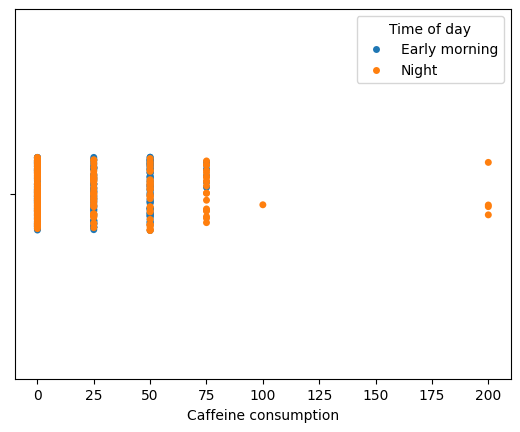

In [205]:
sns.stripplot(Caffeinevssleep, x='Caffeine consumption', hue='Time of day')

<Axes: xlabel='Caffeine consumption'>

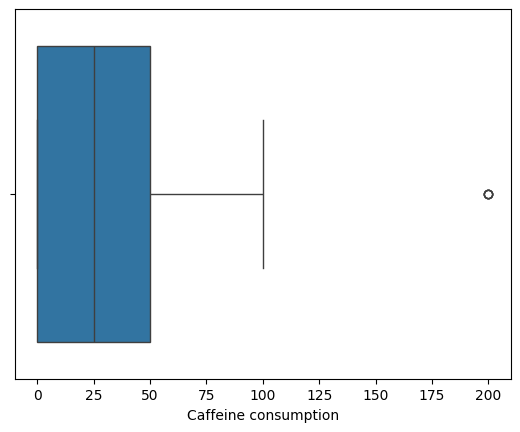

In [199]:
sns.boxplot(Caffeinevssleep, x='Caffeine consumption')

<Axes: xlabel='Caffeine consumption'>

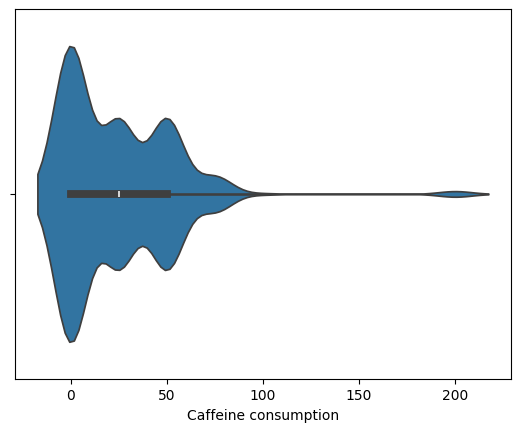

In [200]:
sns.violinplot(Caffeinevssleep, x='Caffeine consumption')


<Axes: xlabel='Caffeine consumption', ylabel='Sleep duration'>

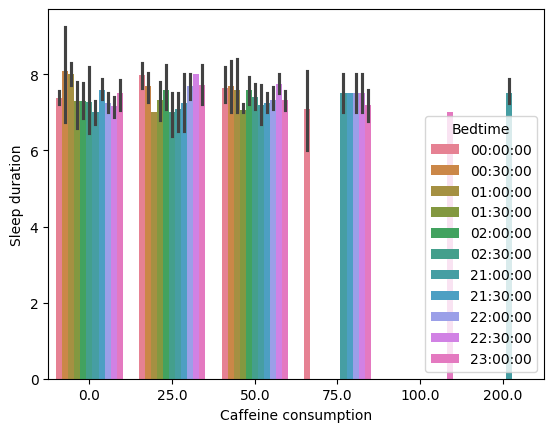

In [201]:
Caffeinevssleep= Caffeinevssleep.sort_values('Bedtime')
sns.barplot(Caffeinevssleep,x='Caffeine consumption', y='Sleep duration', hue='Bedtime' )


<Axes: xlabel='Caffeine consumption', ylabel='Bedtime'>

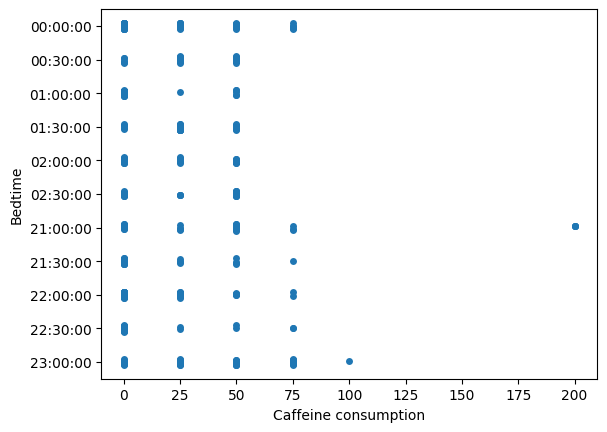

In [202]:
sns.stripplot(data=Caffeinevssleep, x='Caffeine consumption',y='Bedtime')

<Axes: xlabel='Caffeine consumption', ylabel='Sleep efficiency'>

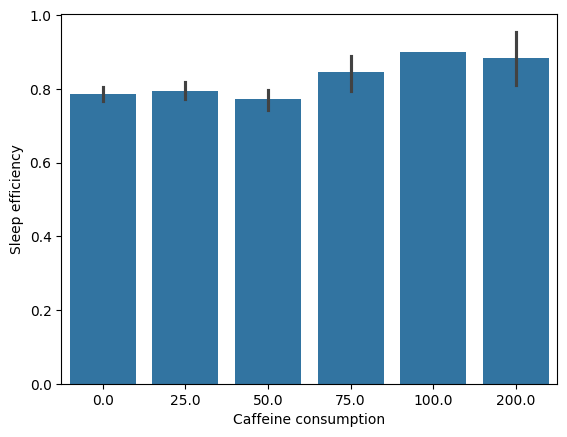

In [203]:
sns.barplot(Caffeinevssleep,x='Caffeine consumption', y='Sleep efficiency' )

<Axes: xlabel='Caffeine consumption', ylabel='REM sleep percentage'>

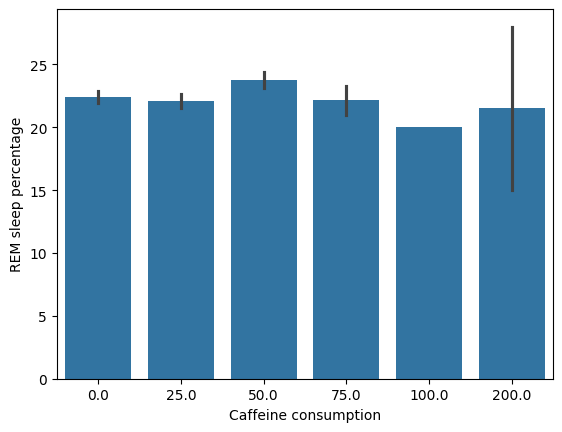

In [204]:
sns.barplot(Caffeinevssleep,x='Caffeine consumption', y='REM sleep percentage' )